In [10]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import cm

import sktda

In [11]:
data = pd.read_csv('Iris.csv')

In [13]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Convert Data to Point Cloud:

Extracting relevant numerical columns for analysis and convert them to a point cloud. In this case, we are considering 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' as our features.

In [19]:
# Extract numerical features
features = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Ensure the data is in a suitable format (numpy array)
point_cloud = np.array(features)

Compute Persistent Homology and Generate Persistence Diagrams:

We are using the ripser library to compute the persistent homology and generate persistence diagrams

In [20]:
from ripser import Rips

# Create a Rips complex
rips = Rips(maxdim=2)  # Maximum dimension of the homology to compute

# Compute the persistence diagrams
diagrams = rips.fit_transform(point_cloud) # the diagrams variable will contain the persistence diagrams.

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


To plot persistence diagrams using ripser, we manually plot them using matplotlib

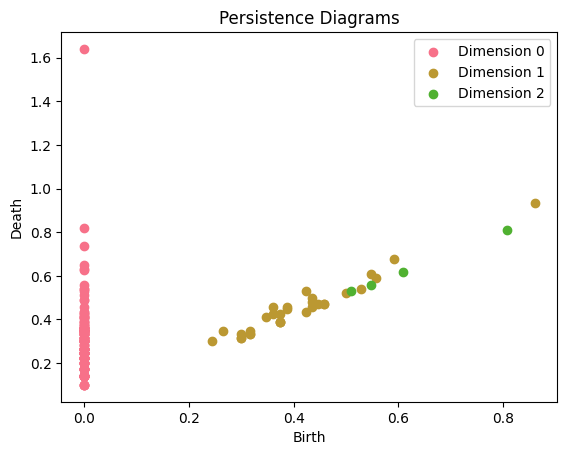

In [22]:
# Assuming `diagrams` contains your persistence diagrams
for dim, diagram in enumerate(diagrams):
    if len(diagram) > 0:
        plt.scatter(diagram[:, 0], diagram[:, 1], label=f'Dimension {dim}')
plt.xlabel('Birth')
plt.ylabel('Death')
plt.title('Persistence Diagrams')
plt.legend()
plt.show()